# 第9章 数学工具

## 9.1 逼近法

在给定区间内通过回归和差值求取该函数的近似值。 首先，我们生成该函数的图形， 更好地观察逼近法所实现的结果。我们感兴趣的区间是[-2π,2π]。下图显示了该函数在通过linspace函数定义的固定区间上的图像。np.linspace(start, stop,num）返回从 star 开始 ， stop 结束的 num 个点， 两个连续点之间的子区间均匀分布：

Text(0, 0.5, 'f(x)')

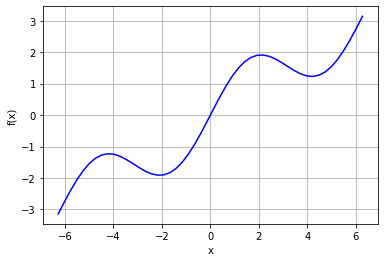

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return np.sin(x) + 0.5 * x


x = np.linspace(-2 * np.pi, 2 * np.pi, 50)
plt.plot(x,f(x),'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### 9.1.1 回归

> 回归是相当高敬的函数近似值计算工具。

#### 作为基函数的单项式

Text(0, 0.5, 'f(x)')

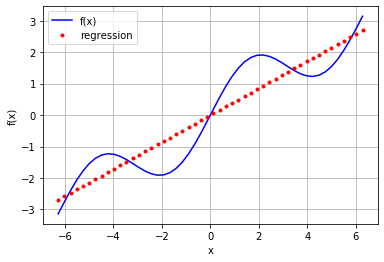

In [2]:
# 典型向量化风格的polyfit和polyval线性回归（deg=1）
# 使用 1 次单项式作为基函数
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

> NumPy有确定最优参数（polyfit）和以一组输入值求取近似值（polyval ) 的内建函数。 
polyfit函数参数

| 参数 | 描述                       |
| ---- | -------------------------- |
| x    | x坐标（自变量值）          |
| y    | y坐标（因变量值）          |
| deg  | 多项式拟合度               |
| full | 如果为真返回额外的诊断信息 |
| w    | 应用到y坐标的权重          |
| cov  | 如果为真返回协方差矩阵     |

* 使用 5 次单项式作为基函数

Text(0, 0.5, 'f(x)')

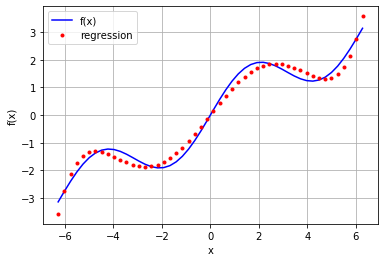

In [3]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

* 使用 7 次单项式作为基函数

Text(0, 0.5, 'f(x)')

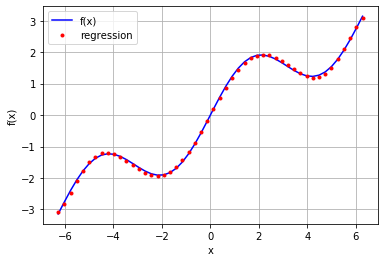

In [4]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

* 简单的检查

In [5]:
print(np.allclose(f(x), ry))
# False

print(np.sum((f(x) - ry) ** 2) / len(x))
# 0.0017769134759517721

False
0.0017769134759517689


#### 单独的基函数

一般来说， 当选择更好的基函数组时， 可以得到更好的回归结果， 例如利用对函数的认识进行近似值计算。在这种情下，单独的基函数必须通过一个矩阵方法定义（也就是使用NumPy ndarray对象）。

[ 1.50654604e-14  5.62777448e-01 -1.11022302e-15 -5.43553615e-03]


/Library/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0, 0.5, 'f(x)')

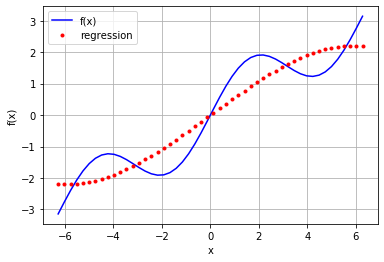

In [6]:
import sys
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

reg = np.linalg.lstsq(matrix.T, f(x))[0]
print(reg)

ry = np.dot(reg, matrix)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

图中的结果并不真的如预期那么好。使用更通用的方法，可以利用对示例函数的认识。我们知道函数中有一个 sin 部分。因此，在基函数中包含一个正弦函数是有意义的。 为了简单起见． 我们替换最高次的单项式：

/Library/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


Text(0, 0.5, 'f(x)')

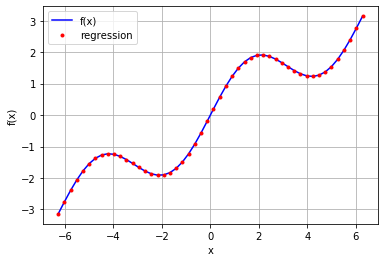

In [7]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

* 简单的检查

In [8]:
print(np.allclose(f(x),ry))
# True
print(np.sum((f(x) - ry) ** 2) / len(x))
# 2.1855453008906352e-31

print(reg)

True
3.404735992885531e-31
[4.2004068e-16 5.0000000e-01 0.0000000e+00 1.0000000e+00]


#### 有噪声的数据

回归对于有噪声的数据同样能够很好的处理，这种数据来自于模拟或者（不完善的）测量。 为了阐述这个要点，我们生成同样具有噪声的自变量观测值和因变量观测值：

Text(0, 0.5, 'f(x)')

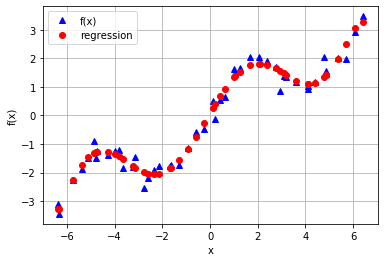

In [9]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

#### 未排序数据

回归的另一个重要特点是这种方法可以无缝地处理未排序数据。前面的例子都依赖于经过排序的x数据， 情况并不总是这样的， 为了说明这一点， 我们随机产生自变量数据点：

[-6.09 -5.55  4.57  5.37 -5.6  -0.25 -5.41  1.64  4.5   0.82]
[-2.85 -2.1   1.3   1.9  -2.17 -0.37 -1.93  1.82  1.27  1.14]


Text(0, 0.5, 'f(x)')

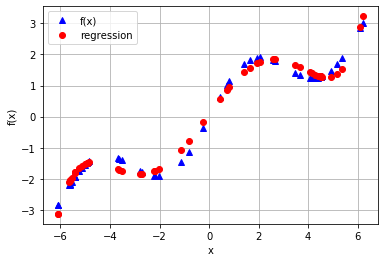

In [10]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)
# 在这种情况下，仅靠从视觉上检查原始数据很难识别出任何结构：
print(xu[:10].round(2))
print(yu[:10].round(2))
# [ 4.94  6.05  2.34  5.8   5.39  2.13 -0.54  6.11  0.9  -5.52]
# [ 1.5   2.79  1.89  2.43  1.91  1.91 -0.78  2.88  1.23 -2.07]

# 和有噪声数据一样，回归方法不关心观测点的顺序。
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

#### 多维

最小二乘回归方法的另一个便利特性是不需要太多的修改就可以用于多维的情况

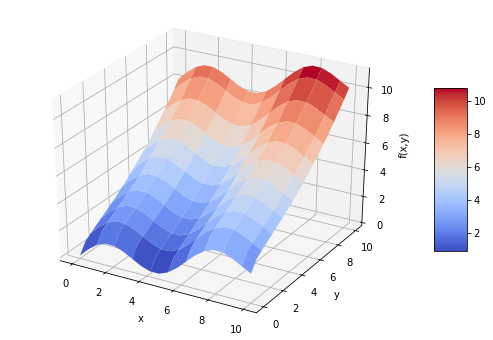

In [11]:
def fm(x, y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2


x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
# generates 2-d grids out of the 1-d arrays
Z = fm(X, Y)
x = X.flatten()
y = Y.flatten()

# 根据以 x,y,z 表示的自变量和因变量数据点网格，显示fm函数的形状
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

为了获得好的回归结果，我们编辑一组基函数，包括一个sin 和 一个 sqrt 函数，利用了我们对函数的认识：

In [12]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

# statsmodels库提供了相当通用和有益的函数OLS，可以用于一维和多维最小二乘回归
import statsmodels.api as sm

model = sm.OLS(fm(x, y), matrix).fit()
# OLS 函数的好处之一是提供关于回归及其质量的大量附加信息。 调用 model.summary可以访问结果的一个摘要。单独统计数字（如 确定系数）通常可以直接的问
print('model.rsquared:', model.rsquared)
# 1.0
a = model.params
print('a:', a)
# array([ -4.37150316e-15,   2.50000000e-01,   1.88737914e-15,
#         -2.93168267e-16,   5.00000000e-02,   1.00000000e+00,
#          1.00000000e+00])

model.rsquared: 1.0
a: [ 7.77156117e-15  2.50000000e-01 -1.33226763e-15 -3.67761377e-16
  5.00000000e-02  1.00000000e+00  1.00000000e+00]


reg_func返回给定最优回归参数和自变量数据点的回归函数值：

In [13]:
def reg_func(a, x, y):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

将这些值与示例函数原始构成比较

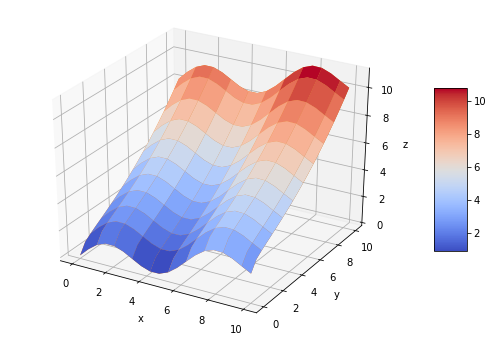

In [14]:
RZ = reg_func(a, X, Y)
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2 = ax.plot_surface(X, Y, RZ, rstride=2, cstride=2, label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
#ax.legend()
fig.colorbar(surf1, shrink=0.5, aspect=5)

最小二乘回归方法有多种应用领域， 包括简单的函数逼近和基于有噪声或者未排序数据的函数逼近。 这些方法可以应用于一维问题， 也可以应用于多维问题。 由于这种方法的基础数学理论使然， 在一维问题和多维问题上的应用总是 “几乎相同”

### 9.1.2 插值

与回归相比， 插值〈例如， 三次样条插值）在数学上更为复杂。 它还被限制在低维度问题上。给定一组有序的观测点（按照x维排序）， 基本的思路是在两个相邻数据点之间进行回归。不仅产生的分段插值函数完全匹配数据点， 而且函数在数据点上连续可微分。 连续可微分性需要至少三阶插值一一也就是三次样条插值。 然而， 这种方法一般也适用于四次甚至线性样条插值。

在给定以x排序的数据点集时， 应用这种方法和polyft、polyval 一样简单， 此时对应的函数是splrep和splev。

* **splrep函数参数**

| 参数        | 描述                                        |
| ----------- | ------------------------------------------- |
| x           | (有序)x坐标（自变量值）                     |
| y           | （按x排序）y坐标（因变量值）                |
| w           | 应用到y坐标的权重                           |
| xb,xe       | 拟合区间，如果设置为None则区间为[x[0],[-1]] |
| k           | 样条拟合顺序（1<=k<=5）                     |
| s           | 平滑因子                                    |
| full_output | 如果为真，返回附加输出                      |
| quiet       | 如果为真，抑制消息                          |

* **splev函数参数**

| 参数 | 描述                                                         |
| ---- | ------------------------------------------------------------ |
| x    | (有序)x坐标（自变量值）                                      |
| tck  | splrep返回的长度为3的序列（节点，系数，阶数）                |
| der  | 导数的阶（0为元函数，1为一阶导数）                           |
| ext  | 如果x不在节点序列中时的行为（0外推，1返回0，2引发ValueError异常） |

Text(0, 0.5, 'f(x)')

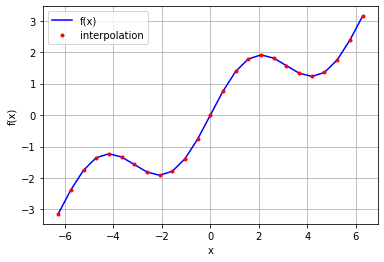

In [15]:
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt

x = np.linspace(-2 * np.pi, 2 * np.pi, 25)


def f(x):
    return np.sin(x) + 0.5 * x


ipo = spi.splrep(x, f(x), k=1)
iy = spi.splev(x, ipo)

plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [16]:
print(np.allclose(f(x),iy))

True


样条插值在金融学中往往用于估算未包含在原始观测点中的自变量数据点的因变量值。 为次，我们选择一个更小的区间 ， 仔细观察一次样条插入的值：

Text(0, 0.5, 'f(x)')

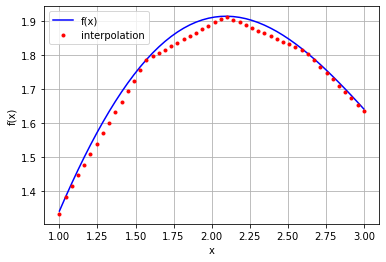

In [17]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

插值函数确实线性地在两个观测点之间插值。 对于某些应用， 这可能不够精确。此外， 很明显函数在原始数据点上不是连续可微分的一一这是另一个不足

Text(0, 0.5, 'f(x)')

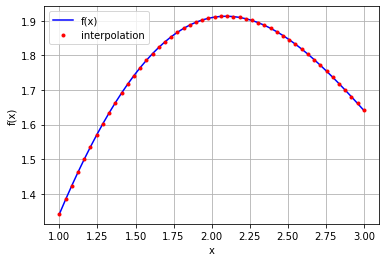

In [18]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [19]:
print(np.allclose(f(xd), iyd))
# False

print(np.sum((f(xd)-iyd)**2)/len(xd))
# 1.1349319851436252e-08

False
1.1349319851436892e-08


从数值上看， 这种插值并不完美，但是MSE确实很小。

* 插值 

在可以应用样条插值的情况下， 可以预期比最小二来回归方法更好的近似结果。 但是要记住， 你必须有排序（且“无噪声”）的数据， 该方法仅限于低维度问题。 样条插值的计算要求也更高， 在某些用例中可能导致花费的时间比回归方法长得多。

## 9.2 凸优化

在金融学和经济学中， 凸优化起着重要的作用。 这方面的例子包括根据市场数据校准期权定价模型， 或者效用函数的优化。我们以下面定义的函数 fm 为例进行这种优化：

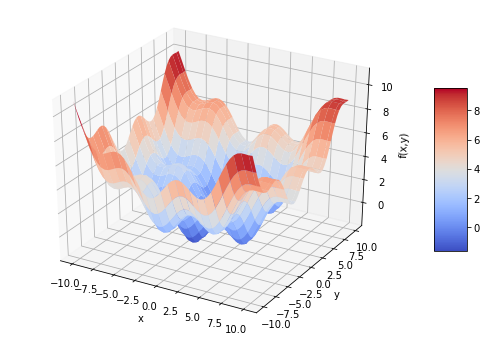

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

def fm(x, y):
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)


x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm(X, Y)

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

### 9.2.1 全局优化

为了更仔细地观察初始化最小化过程时后台发生的情况， 我们改善原函数， 通过一个选项输出当前参数值和函数值：

In [21]:
output = True
def fo(x):
    z = np.sin(x[0]) + 0.05 * x[0] ** 2 + np.sin(x[1]) + 0.05 * x[1] ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x[0], x[1], z))
    return z

brute以参数范围作为输入。 例如， 提供x值范围（－ 10, 10.1, 5 ）会得到， -10、 -5 、 0 、 5 、 10这5个 “测试值 ” ：

In [22]:
import scipy.optimize as spo

output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

在给定的函数初始参数化条件下， 最优化参数值是x=y=0。 回顾前面的输出可以看出，结果函数值也为0。第一次参数化相当粗糙，我们对两个输人参数均使用5的步距。这当然有很大的微调空间， 得到更好的结果：

In [23]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
print(opt1)
# array([-1.4, -1.4])
print(fm(opt1[0], opt1[1]))
# -1.7748994599769203

[-1.4 -1.4]
-1.7748994599769203


最优化参数值现在是 x=y=1.4， 全局最小化的最小函数值大约为－1.7749

### 9.2.2 局部优化

In [24]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
print(opt2)

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757
[-1.42702972 -1.42876755]


In [25]:
print(fm(opt2[0], opt2[1]))

-1.7757246992239009


我们可以观察到解决方案的徽调和更低的函数值。

在许多凸优化问题中， 建议在局部优化之前进行全局优化。 主要原因是局部凸优化算法很容易陷人某个局部最小值（所谓的 “盆地跳跃 ” （ basin hopping））， 而忽略“更好”的局部最小值和全局最小值。下面可以看到’ 将初始参数化设置为x=y=2得出高于0的“最小”值：

In [26]:
output = False
opt3 = spo.fmin(fo, (2.0, 2.0), maxiter=250)

# Optimization terminated successfully.
#          Current function value: 0.015826
#          Iterations: 46
#          Function evaluations: 86
# Out[11]: array([ 4.2710728 ,  4.27106945])
print(fm(opt3[0], opt3[1]))
# 0.015825753274680499

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86
0.0158257532746805


### 9.2.3 有约束优化

> 以后查询

## 9.3 积分

在估值和期权定价时，积分是一个重要的数学工具。 这来源于一个事实：衍生物的风险中立价值一般可以用风险中立（鞍）测度下的预期折现收益来表示。 这一预期在离散情况下是个总和。在连续情况下是一个积分。scipy.integrate子库提供了数值积分所用的不同函数：

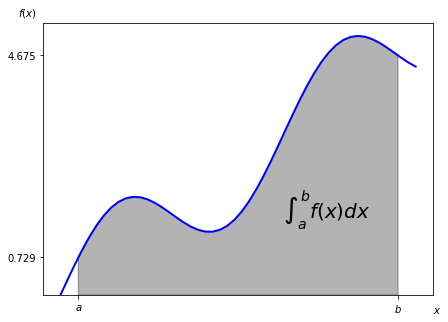

In [27]:
import scipy.integrate as sci

# 继续使用由sin部分和线性部分组成的示例函数
def f(x):
    return np.sin(x) + 0.5 * x


# 我们感兴趣的是［0.5, 9.5]区间内的积分
a = 0.5
b = 9.5
x = np.linspace(0, 10)
y = f(x)

from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# area unde the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

### 9.3.1 数值积分

interate 子库包含一组精选的函数． 可以计算给定上下限和数学函数下的数值积分。这些函数的例子包含用于固定高斯求积的 fixed_quad 、用于自适应求积的 quad 和用于龙贝格积分的romberg

In [28]:
import scipy.integrate as sci

sci.fixed_quad(f, a, b)[0]
# 24.366995967084602
sci.quad(f, a, b)[0]
# 24.374754718086752
sci.romberg(f, a, b)
# 24.374754718086713

24.374754718086713

还有一些积分函数以输入列表或者包含函数值和输入值的 ndarray 对象作为输入。这种函数的例子包括使用梯形法则的 trapz，和实现辛普森法则的 slmps：

In [29]:
xi = np.linspace(0.5, 9.5, 25)
sci.trapz(f(xi), xi)
# 24.352733271544516
sci.simps(f(xi), xi)
# 24.374964184550748

24.37496418455075

### 9.3.2 通过模拟求取积分

通过蒙特卡洛模拟的期权和衍生物估值依赖于通过模拟求取和、分奇为此，在积分区间内取I个随机的x值，并计算每个随机x值处的积分函数值。加总所有函数值并求其平均值， 就可以得到积分区间中的平均函数值。将该值乘以积分区间长度， 可以得出估算的积分值。

In [30]:
np.random.seed(1000)
for i in range(1, 20):
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.804762279331463
26.995940139170216
21.49807276401935
23.375810827724724
24.415978409475574
25.79399221402905
23.40662851484494
22.733343312524312
24.163867044160472
25.40114867731928
23.98820658766707
23.840069125214118
23.881372319965937
23.511721847320054
25.61478644431556
24.861316466064753
24.07782712754946
24.594230276320758
24.55741216960413


## 9.4 符号计算

### 9.4.1 基本知识

In [31]:
import sympy as sy

x = sy.Symbol('x')
y = sy.Symbol('y')
type(x)
# sympy.core.symbol.Symbol

sy.sqrt(x)
# sqrt(x)

3 + sy.sqrt(x) - 4 ** 2
# sqrt(x) - 13

f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2
sy.simplify(f)
# 1.5*x**2 + 4.5

1.5*x**2 + 4.5

SymPy为数学表达式提供了 3 个基本的渲染器： 
1. 基于 LaTex 的渲染器 
2. 基于unicode 的渲染器 
3. 基于 ASCII 的渲染器

### 9.4.2 方程式

In [32]:
# SymPy的长处之一是解方程， 例如 x^2-1=0 这样的形式:
sy.solve(x**2-1)
# [-1, 1]

sy.solve(x ** 2 - 1 - 3)
# [-2, 2]

# SymPy可以处理更复杂的表达式， 如 x^3 + 0.5x^2 -1 = 0:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)
# [0.858094329496553,
#  -0.679047164748276 - 0.839206763026694*I,
#  -0.679047164748276 + 0.839206763026694*I]

# 不管从数学的角度（解的存在性）还是从算法的角度（实现）， 都很明显不能保证有解

# 对于有超过一个输入参数的函数， SymPy 也同样有效，对于复数也是如此。举个简单的例子， 求 x^2 + y^2 =O 的解:

sy.solve(x ** 2 + y ** 2)
# [{x: -I*y}, {x: I*y}]

[{x: -I*y}, {x: I*y}]

### 9.4.3 积分

In [33]:
a, b = sy.symbols('a b')
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))
# b
# ⌠
# ⎮ (0.5⋅x + sin(x)) dx
# ⌡
# a

# 使用 integrate 可以得出积分函数的反导数（不定积分）
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)
print(sy.pretty(int_func))
#       2
# 0.25⋅x  - cos(x)

# 有了反导数, 求积分只需要三步。要求取 SymPy 表达式的值，用方法 subs 将数值代人对应的符号， 在新表达式上调用方法 evalf:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()
# Fb 和 Fa 的差就是积分的准确值:
Fb - Fa
# 24.3747547180867

# 积分也可以用符号积分上下限得到符号解
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print(sy.pretty(int_func_limits))
#         2         2
# - 0.25⋅a  + 0.25⋅b  + cos(a) - cos(b)

int_func_limits.subs({a: 0.5, b: 9.5}).evalf()
# 24.3747547180868

# 提供最化的积分上下限， 在一步中得出准确的值
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))
# 24.3747547180867

b                    
⌠                    
⎮ (0.5⋅x + sin(x)) dx
⌡                    
a                    
      2         
0.25⋅x  - cos(x)
        2         2                  
- 0.25⋅a  + 0.25⋅b  + cos(a) - cos(b)


24.3747547180867

### 9.4.4 微分

In [34]:
# 对不定积分求导通常应该得出原函数。 我们对前面的符号反导数应用 diff 应函数， 检查这一点：
int_func.diff()
# 0.5*x + sin(x)

# 现在使用微分得出前面的凸最小化问题的解
f = (sy.sin(x) + 0.05 * x ** 2 + sy.sin(y) + 0.05 * y ** 2)
del_x = sy.diff(f, x)
del_x
# 0.1*x + cos(x)
del_y = sy.diff(f, y)
del_y
# 0.1*y + cos(y)

# 全局最小值的必要（但不充分）条件之一是两个偏微分都为0。如前所述 ， 这不能保证有符号解。算法和（多种）存在性问题在这里都起作用。 然而，我们可以从数值上求出两个方程式的解，根据前面的全局和局部最小化工作提供 “有根据 ” 的推测：

x0 = sy.nsolve(del_x, -1.5)
x0
# mpf('-1.4275517787645941')
y0 = sy.nsolve(del_y, -1.5)
y0
# mpf('-1.4275517787645941')
f.subs({x: x0, y: y0}).evalf()  # global minimum
# -1.77572565314742


# 提供没有根据/随机的猜测，同样可能使算法陷入某个局部最小值， 而非全局最小值
x0 = sy.nsolve(del_x, 1.5)
x0
# mpf('1.7463292822528528')

y0 = sy.nsolve(del_y, 1.5)
y0
# mpf('1.7463292822528528')

f.subs({x: x0, y: y0}).evalf()  # local minimum
# 2.27423381055640

# 这从数值上说明了偏微分为0是必要条件, 但并充分条件。

2.27423381055640